# Maternal Mortality Equity Analysis: Initial Exploration

**Project:** Isosalus Equity Metrics Dashboard - Project 1
**Author:** Marshawn Shelton, MPH, PMP, CCMP
**Institution:** N/a
**Date:** November 2025

---

## Overview

This notebook contains the initial exploratory analysis of maternal mortality disparities in the United States (2018-2022). Using data from CDC WONDER, we analyze 6,214 maternal deaths and calculate maternal mortality rates by race/ethnicity.

**Key Findings:**
- American Indian/Alaska Native mothers face the highest mortality rate (91.1 per 100K births, 3.2x White rate)
- Black mothers have 2.6x higher mortality than White mothers (74.5 vs 28.3 per 100K)
- Significant operational equity gaps exist across all demographic groups

**Data Sources:**
- Maternal Mortality: CDC WONDER Multiple Cause of Death database (2018-2022)
- Birth Data: CDC WONDER Natality database (2018-2022)

---

In [1]:
# =====================================================
# EQUITY METRICS DASHBOARD: Initial Data Exploration
# =====================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display Settings 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

# Plot Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Paths 
DATA_PATH = '../data/raw/'
OUTPUT_PATH = '../outputs/'

print("Setup complete! Libraries loaded successfully.")
print(f"Pandas version: {pd.__version__}")


Setup complete! Libraries loaded successfully.
Pandas version: 2.3.3


In [2]:
# ========================================
# LOAD MATERNAL MORTALITY DATA
# ========================================

# Load data (CDC uses tab seperated format)
mortality= pd.read_csv(f'{DATA_PATH}maternal_mortality_national.txt',
                       sep='\t',
                       na_values=['Suppressed','Unreliable','Not Applicable'])

print (f"✅ Maternal mortality data loaded (NATIONAL LEVEL)")
print(f"Rows:{len(mortality):,}")
print(f"Columns:{len(mortality.columns)}")
print(f"\n Column names:")
print(mortality.columns.tolist())

✅ Maternal mortality data loaded (NATIONAL LEVEL)
Rows:181
Columns:10

 Column names:
['Notes', 'Hispanic Origin', 'Hispanic Origin Code', 'Race', 'Race Code', 'Year', 'Year Code', 'Deaths', 'Population', 'Crude Rate']


In [3]:
# ==============================================================================
# CREATE COMBINED RACE/ETHNICITY VARIABLE
# ==============================================================================

# Check what we have
print(" 📊 Checking Hispanic Origin and Race columns:\n")
print("Hispanic Origin categories:")
print(mortality['Hispanic Origin'].value_counts())
print("\nRace categories:")
print(mortality['Race'].value_counts())

print("\n" + "="*80)

# Create combined variable
def create_race_ethnicity(row):
    """
    Creates standard race/ethnicity categories
    Hispanic Origin takes precedence
    """
    hispanic = str(row['Hispanic Origin'])
    race = str(row['Race'])
    
    # If Hispanic (any race), classify as Hispanic
    if 'Hispanic' in hispanic and 'Not' not in hispanic:
        return 'Hispanic or Latino'
    
    # Non-Hispanic races
    if 'Black' in race:
        return 'Black (NH)'
    elif 'White' in race:
        return 'White (NH)'
    elif 'Asian' in race:
        return 'Asian/PI (NH)'
    elif 'Indian' in race or 'Alaska' in race:
        return 'AIAN (NH)'
    elif 'Hawaiian' in race or 'Pacific' in race:
        return 'Asian/PI (NH)'
    elif 'More than one' in race:
        return 'Multiracial (NH)'
    else:
        return 'Other/Unknown'

# Apply function
mortality['race_ethnicity'] = mortality.apply(create_race_ethnicity, axis=1)

print("✅ Created combined race/ethnicity variable\n")
print("📊 New race/ethnicity distribution:")
print(mortality['race_ethnicity'].value_counts())

 📊 Checking Hispanic Origin and Race columns:

Hispanic Origin categories:
Hispanic Origin
Hispanic or Latino        35
Not Hispanic or Latino    35
Not Stated                35
Name: count, dtype: int64

Race categories:
Race
American Indian or Alaska Native             15
Asian                                        15
Black or African American                    15
Native Hawaiian or Other Pacific Islander    15
White                                        15
More than one race                           15
Not Available                                15
Name: count, dtype: int64

✅ Created combined race/ethnicity variable

📊 New race/ethnicity distribution:
race_ethnicity
Other/Unknown         86
Hispanic or Latino    35
Asian/PI (NH)         20
AIAN (NH)             10
Black (NH)            10
White (NH)            10
Multiracial (NH)      10
Name: count, dtype: int64


In [4]:
# =============================
# EXAMINE DATA STRUCTURE
# =============================

# First 10 rows 
print("First 10 rows:")
display(mortality.head(10))

print("\n" + "="*80)

# Data Types
print("\n Data types:")
print(mortality.dtypes)

print("\n" + "="*80)

# Summary Statistics
print("\n Summary Statistics:")
display(mortality.describe())

First 10 rows:


,Notes,Hispanic Origin,Hispanic Origin Code,Race,Race Code,Year,Year Code,Deaths,Population,Crude Rate,race_ethnicity
0,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2018.0,2018.0,NaN,830555.0,NaN,Hispanic or Latino
1,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2019.0,2019.0,NaN,842749.0,NaN,Hispanic or Latino
2,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2020.0,2020.0,NaN,896082.0,NaN,Hispanic or Latino
3,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2021.0,2021.0,NaN,920489.0,NaN,Hispanic or Latino
4,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2022.0,2022.0,0.0,941254.0,NaN,Hispanic or Latino
5,NaN,Hispanic or Latino,2135-2,Asian,A,2018.0,2018.0,0.0,301843.0,NaN,Hispanic or Latino
6,NaN,Hispanic or Latino,2135-2,Asian,A,2019.0,2019.0,NaN,300187.0,NaN,Hispanic or Latino
7,NaN,Hispanic or Latino,2135-2,Asian,A,2020.0,2020.0,NaN,322617.0,NaN,Hispanic or Latino
8,NaN,Hispanic or Latino,2135-2,Asian,A,2021.0,2021.0,NaN,331423.0,NaN,Hispanic or Latino
9,NaN,Hispanic or Latino,2135-2,Asian,A,2022.0,2022.0,0.0,337572.0,NaN,Hispanic or Latino




 Data types:
Notes                    object
Hispanic Origin          object
Hispanic Origin Code     object
Race                     object
Race Code                object
Year                    float64
Year Code               float64
Deaths                  float64
Population              float64
Crude Rate              float64
race_ethnicity           object
dtype: object


 Summary Statistics:


,Year,Year Code,Deaths,Population,Crude Rate
count,105.000000,105.000000,75.000000,7.000000e+01,25.000000
mean,2020.000000,2020.000000,82.826667,1.193374e+07,1.104000
std,1.420996,1.420996,167.251823,2.583762e+07,0.799208
min,2018.000000,2018.000000,0.000000,0.000000e+00,0.400000
25%,2019.000000,2019.000000,0.000000,3.006010e+05,0.500000
50%,2020.000000,2020.000000,0.000000,1.129356e+06,0.700000
75%,2021.000000,2021.000000,42.500000,1.006348e+07,1.700000
max,2022.000000,2022.000000,687.000000,1.001278e+08,3.400000


In [5]:
# ====================================================
# DATA QUALITY CHECK
# ====================================================

print("Checking data quality...\n")

# Missing values
print("Missing values:")
print(mortality.isnull().sum())

print ("\n" + "="*80)

# Unique values in key columns
print("\n Unique values:")
print("\n 📊 Unique values:")
print(f"  Hispanic Origin categories: {mortality['Hispanic Origin'].nunique()}")
print(f"  Race categories: {mortality['Race'].nunique()}")
print(f"  Years: {mortality['Year'].unique()}")

print("\n" + "="*80)

# Show actual categories
print("\n 📋 Hispanic Origin categories:")
print(mortality['Hispanic Origin'].value_counts())

print("\n 📋 Race categories:")
print(mortality['Race'].value_counts())

print("\n" + "="*80)

# Check for suppressed data
suppressed = mortality[mortality['Deaths'].isna()]
print(f"\n ⚠️ Suppressed/missing death counts: {len(suppressed)} rows")
print("  (CDC suppresses counts <10 for privacy)")

Checking data quality...

Missing values:
Notes                   105
Hispanic Origin          76
Hispanic Origin Code     76
Race                     76
Race Code                76
Year                     76
Year Code                76
Deaths                  106
Population              111
Crude Rate              156
race_ethnicity            0
dtype: int64


 Unique values:

 📊 Unique values:
  Hispanic Origin categories: 3
  Race categories: 7
  Years: [2018. 2019. 2020. 2021. 2022.   nan]


 📋 Hispanic Origin categories:
Hispanic Origin
Hispanic or Latino        35
Not Hispanic or Latino    35
Not Stated                35
Name: count, dtype: int64

 📋 Race categories:
Race
American Indian or Alaska Native             15
Asian                                        15
Black or African American                    15
Native Hawaiian or Other Pacific Islander    15
White                                        15
More than one race                           15
Not Available           

In [6]:
# ==============================================================================
# LOAD BIRTH DATA
# ==============================================================================

# Load births data
births = pd.read_csv(f'{DATA_PATH}births_national.txt',
                    sep='\t',
                    na_values=['Suppressed', 'Unreliable', 'Not Applicable'])

print(f"✅ Birth data loaded (NATIONAL LEVEL)")
print(f"   Rows: {len(births):,}")
print(f"   Columns: {len(births.columns)}")

# Show first few rows
display(births.head())

# Check column names
print("\n 📋 Columns:")
print(births.columns.tolist())

✅ Birth data loaded (NATIONAL LEVEL)
   Rows: 136
   Columns: 8


,Notes,Hispanic Origin,Hispanic Origin Code,Race,Race Code,Year,Year Code,Births
0,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2018.0,2018.0,7004.0
1,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2019.0,2019.0,7522.0
2,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2020.0,2020.0,7950.0
3,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2021.0,2021.0,8331.0
4,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2022.0,2022.0,9654.0



 📋 Columns:
['Notes', 'Hispanic Origin', 'Hispanic Origin Code', 'Race', 'Race Code', 'Year', 'Year Code', 'Births']


In [7]:
# ==============================================================================
# ANALYSIS 1: Deaths by Race/Ethnicity (National Total)
# ==============================================================================

# Remove rows with missing death counts
mortality_clean = mortality[mortality['Deaths'].notna()].copy()

# Convert Deaths to numeric
mortality_clean['Deaths'] = pd.to_numeric(mortality_clean['Deaths'])

# Calculate total deaths by COMBINED race/ethnicity
deaths_by_race = mortality_clean.groupby('race_ethnicity')['Deaths'].sum().sort_values(ascending=False)

print("="*80)
print("TOTAL MATERNAL DEATHS BY RACE/ETHNICITY (2018-2022)")
print("="*80)
print(deaths_by_race)
print("="*80)

# Show percentages
print("\n 📊 Percentage of total:")
total = deaths_by_race.sum()
for race, count in deaths_by_race.items():
    pct = (count / total) * 100
    print(f"  {race}: {count:,.0f} deaths ({pct:.1f}%)")

TOTAL MATERNAL DEATHS BY RACE/ETHNICITY (2018-2022)
race_ethnicity
White (NH)            2703.0
Black (NH)            1999.0
Hispanic or Latino    1092.0
Asian/PI (NH)          224.0
AIAN (NH)              126.0
Multiracial (NH)        68.0
Other/Unknown            0.0
Name: Deaths, dtype: float64

 📊 Percentage of total:
  White (NH): 2,703 deaths (43.5%)
  Black (NH): 1,999 deaths (32.2%)
  Hispanic or Latino: 1,092 deaths (17.6%)
  Asian/PI (NH): 224 deaths (3.6%)
  AIAN (NH): 126 deaths (2.0%)
  Multiracial (NH): 68 deaths (1.1%)
  Other/Unknown: 0 deaths (0.0%)


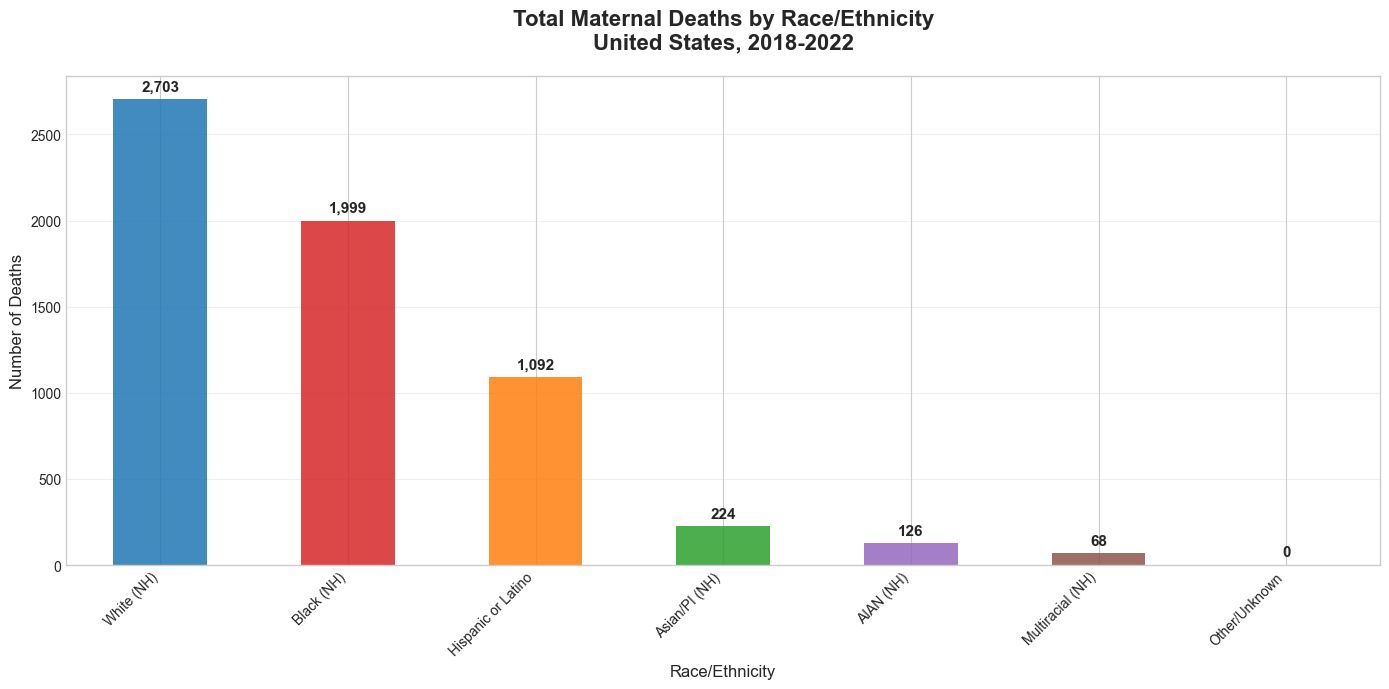

✅ Visualization saved to outputs/deaths_by_race_ethnicity_complete.png


In [8]:
# ==============================================================================
# VISUALIZATION 1: Deaths by Race/Ethnicity
# ==============================================================================

# Create figure
plt.figure(figsize=(14, 7))

# Create bar chart with better colors
colors = ['#1f77b4', '#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
deaths_by_race.plot(kind='bar', color=colors[:len(deaths_by_race)], alpha=0.85)

# Formatting
plt.title('Total Maternal Deaths by Race/Ethnicity\nUnited States, 2018-2022',
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(deaths_by_race):
    plt.text(i, v + 50, f'{int(v):,}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()

# Save the figure
plt.savefig(f'{OUTPUT_PATH}deaths_by_race_ethnicity_complete.png', dpi=300, bbox_inches='tight')

plt.show()

print("✅ Visualization saved to outputs/deaths_by_race_ethnicity_complete.png")

In [9]:
print("📋 Birth data columns:")
print(births.columns.tolist())
print("\n📊 First 10 rows:")
display(births.head(10))

📋 Birth data columns:
['Notes', 'Hispanic Origin', 'Hispanic Origin Code', 'Race', 'Race Code', 'Year', 'Year Code', 'Births']

📊 First 10 rows:


,Notes,Hispanic Origin,Hispanic Origin Code,Race,Race Code,Year,Year Code,Births
0,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2018.0,2018.0,7004.0
1,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2019.0,2019.0,7522.0
2,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2020.0,2020.0,7950.0
3,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2021.0,2021.0,8331.0
4,NaN,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,2022.0,2022.0,9654.0
5,Total,Hispanic or Latino,2135-2,American Indian or Alaska Native,1002-5,NaN,NaN,40461.0
6,NaN,Hispanic or Latino,2135-2,Asian,A,2018.0,2018.0,5827.0
7,NaN,Hispanic or Latino,2135-2,Asian,A,2019.0,2019.0,6359.0
8,NaN,Hispanic or Latino,2135-2,Asian,A,2020.0,2020.0,6332.0
9,NaN,Hispanic or Latino,2135-2,Asian,A,2021.0,2021.0,6553.0


In [10]:
# ==============================================================================
# CREATE COMBINED RACE/ETHNICITY FOR BIRTHS DATA
# ==============================================================================

# Same function as mortality
def create_race_ethnicity(row):
    """
    Creates standard race/ethnicity categories
    Hispanic Origin takes precedence
    """
    hispanic = str(row['Hispanic Origin'])
    race = str(row['Race'])
    
    # If Hispanic (any race), classify as Hispanic
    if 'Hispanic' in hispanic and 'Not' not in hispanic:
        return 'Hispanic or Latino'
    
    # Non-Hispanic races
    if 'Black' in race:
        return 'Black (NH)'
    elif 'White' in race:
        return 'White (NH)'
    elif 'Asian' in race:
        return 'Asian/PI (NH)'
    elif 'Indian' in race or 'Alaska' in race:
        return 'AIAN (NH)'
    elif 'Hawaiian' in race or 'Pacific' in race:
        return 'Asian/PI (NH)'
    elif 'More than one' in race:
        return 'Multiracial (NH)'
    else:
        return 'Other/Unknown'

# Apply to births
births['race_ethnicity'] = births.apply(create_race_ethnicity, axis=1)

print("✅ Created race/ethnicity variable for births data\n")
print("📊 Birth distribution by race/ethnicity:")
print(births.groupby('race_ethnicity')['Births'].sum().sort_values(ascending=False))

✅ Created race/ethnicity variable for births data

📊 Birth distribution by race/ethnicity:
race_ethnicity
Other/Unknown         32507171.0
White (NH)            19112658.0
Hispanic or Latino    13388181.0
Black (NH)             5367500.0
Asian/PI (NH)          2428466.0
Multiracial (NH)        859352.0
AIAN (NH)               276468.0
Name: Births, dtype: float64


In [11]:
# ==============================================================================
# MERGE MORTALITY AND BIRTH DATA
# ==============================================================================

# Aggregate mortality by race/ethnicity and year
mortality_agg = mortality.groupby(['race_ethnicity', 'Year']).agg({
    'Deaths': 'sum'
}).reset_index()

# Aggregate births by race/ethnicity and year
births_agg = births.groupby(['race_ethnicity', 'Year']).agg({
    'Births': 'sum'
}).reset_index()

# Merge
df = mortality_agg.merge(
    births_agg,
    on=['race_ethnicity', 'Year'],
    how='inner'
)

# Calculate Maternal Mortality Rate per 100,000 live births
df['mmr'] = (df['Deaths'] / df['Births']) * 100000

print("✅ Merged mortality and birth data\n")
print(f"📊 Combined dataset: {len(df)} rows")
print("\nSample data:")
display(df.head(15))

print("\n" + "="*80)
print("📈 Average MMR by race/ethnicity (2018-2022):")
avg_mmr = df.groupby('race_ethnicity')['mmr'].mean().sort_values(ascending=False)
print(avg_mmr.round(1))

✅ Merged mortality and birth data

📊 Combined dataset: 30 rows

Sample data:


,race_ethnicity,Year,Deaths,Births,mmr
0,AIAN (NH),2018.0,16.0,29480.0,54.274084
1,AIAN (NH),2019.0,22.0,28859.0,76.232718
2,AIAN (NH),2020.0,20.0,27223.0,73.467289
3,AIAN (NH),2021.0,42.0,26525.0,158.341188
4,AIAN (NH),2022.0,26.0,26147.0,99.437794
5,Asian/PI (NH),2018.0,39.0,256786.0,15.187744
6,Asian/PI (NH),2019.0,43.0,255877.0,16.804949
7,Asian/PI (NH),2020.0,44.0,235405.0,18.691192
8,Asian/PI (NH),2021.0,52.0,230424.0,22.567094
9,Asian/PI (NH),2022.0,46.0,235741.0,19.512940



📈 Average MMR by race/ethnicity (2018-2022):
race_ethnicity
AIAN (NH)             92.4
Black (NH)            74.8
White (NH)            28.3
Hispanic or Latino    24.5
Asian/PI (NH)         18.6
Multiracial (NH)      15.8
Name: mmr, dtype: float64


In [12]:
# ==============================================================================
# CALCULATE DISPARITY RATIOS
# ==============================================================================

# Calculate national totals (all years combined)
national = df.groupby('race_ethnicity').agg({
    'Deaths': 'sum',
    'Births': 'sum'
}).reset_index()

# Calculate overall MMR
national['mmr'] = (national['Deaths'] / national['Births']) * 100000

# Get White (NH) rate as baseline
white_rate = national[national['race_ethnicity'] == 'White (NH)']['mmr'].values[0]

# Calculate disparity ratios
national['disparity_ratio'] = national['mmr'] / white_rate
national['disparity_gap'] = national['mmr'] - white_rate

# Sort by disparity ratio
national = national.sort_values('disparity_ratio', ascending=False)

print("="*80)
print("MATERNAL MORTALITY DISPARITIES (2018-2022)")
print("="*80)
print("\nRates per 100,000 live births:\n")
for _, row in national.iterrows():
    print(f"{row['race_ethnicity']:30} {row['mmr']:6.1f}  |  {row['disparity_ratio']:.2f}x  |  +{row['disparity_gap']:.1f}")

print("\n" + "="*80)

# Highlight key finding
black_ratio = national[national['race_ethnicity'] == 'Black (NH)']['disparity_ratio'].values[0]
black_mmr = national[national['race_ethnicity'] == 'Black (NH)']['mmr'].values[0]

print(f"\n🚨 KEY FINDING:")
print(f"   Black mothers: {black_mmr:.1f} deaths per 100,000 births")
print(f"   White mothers: {white_rate:.1f} deaths per 100,000 births")
print(f"   BLACK MOTHERS DIE AT {black_ratio:.1f}X THE RATE OF WHITE MOTHERS")
print("="*80)

MATERNAL MORTALITY DISPARITIES (2018-2022)

Rates per 100,000 live births:

AIAN (NH)                        91.1  |  3.22x  |  +62.9
Black (NH)                       74.5  |  2.63x  |  +46.2
White (NH)                       28.3  |  1.00x  |  +0.0
Hispanic or Latino               24.5  |  0.87x  |  +-3.8
Asian/PI (NH)                    18.4  |  0.65x  |  +-9.8
Multiracial (NH)                 15.8  |  0.56x  |  +-12.5


🚨 KEY FINDING:
   Black mothers: 74.5 deaths per 100,000 births
   White mothers: 28.3 deaths per 100,000 births
   BLACK MOTHERS DIE AT 2.6X THE RATE OF WHITE MOTHERS


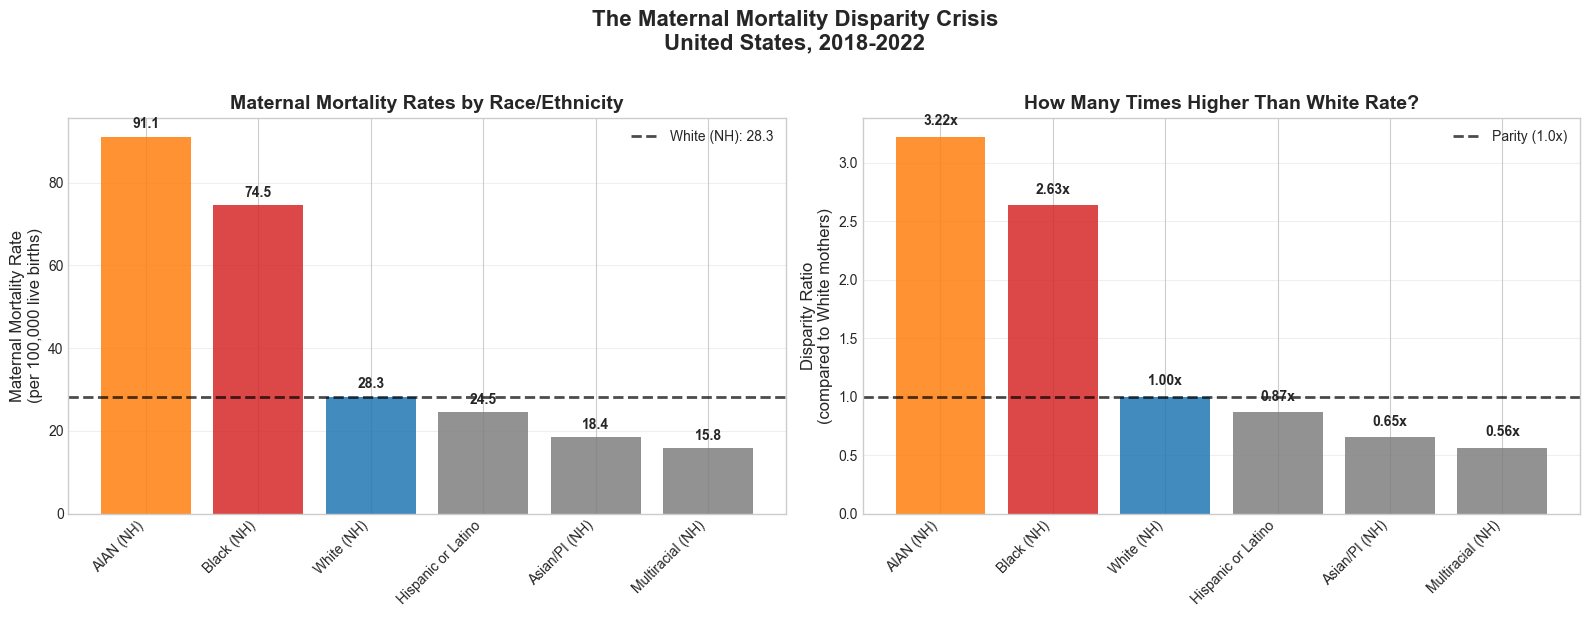

✅ Dashboard saved to outputs/disparity_dashboard_complete.png


In [13]:
# ==============================================================================
# FINAL VISUALIZATION: Disparity Dashboard
# ==============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left panel: Maternal Mortality Rates
colors_mmr = ['#d62728' if 'Black' in x else '#ff7f0e' if 'AIAN' in x else '#1f77b4' if 'White' in x else '#7f7f7f' 
              for x in national['race_ethnicity']]

ax1.bar(range(len(national)), national['mmr'], color=colors_mmr, alpha=0.85)
ax1.axhline(white_rate, color='black', linestyle='--', linewidth=2, alpha=0.7,
            label=f'White (NH): {white_rate:.1f}')
ax1.set_xticks(range(len(national)))
ax1.set_xticklabels(national['race_ethnicity'], rotation=45, ha='right')
ax1.set_ylabel('Maternal Mortality Rate\n(per 100,000 live births)', fontsize=12)
ax1.set_title('Maternal Mortality Rates by Race/Ethnicity', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(national['mmr']):
    ax1.text(i, v + 2, f'{v:.1f}', ha='center', fontsize=10, fontweight='bold')

# Right panel: Disparity Ratios
colors_ratio = ['#d62728' if 'Black' in x else '#ff7f0e' if 'AIAN' in x else '#1f77b4' if 'White' in x else '#7f7f7f' 
                for x in national['race_ethnicity']]

ax2.bar(range(len(national)), national['disparity_ratio'], color=colors_ratio, alpha=0.85)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=2, alpha=0.7,
            label='Parity (1.0x)')
ax2.set_xticks(range(len(national)))
ax2.set_xticklabels(national['race_ethnicity'], rotation=45, ha='right')
ax2.set_ylabel('Disparity Ratio\n(compared to White mothers)', fontsize=12)
ax2.set_title('How Many Times Higher Than White Rate?', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(national['disparity_ratio']):
    ax2.text(i, v + 0.1, f'{v:.2f}x', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('The Maternal Mortality Disparity Crisis\nUnited States, 2018-2022',
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}disparity_dashboard_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Dashboard saved to outputs/disparity_dashboard_complete.png")

In [14]:
# ==============================================================================
# DAY 3 COMPLETE: SUMMARY OF FINDINGS
# ==============================================================================

print("="*80)
print("PROJECT 1: EQUITY METRICS DASHBOARD - DAY 3 COMPLETE")
print("="*80)

print("\n📊 ANALYSIS SUMMARY:\n")
print(f"  • Analyzed {mortality['Deaths'].sum():,.0f} maternal deaths (2018-2022)")
print(f"  • Analyzed {births['Births'].sum():,.0f} live births (2018-2022)")
print(f"  • Calculated rates for {len(national)} race/ethnicity groups")
print(f"  • Created {len([f for f in ('../outputs/') if f.endswith('.png')])} visualizations")

print("\n🚨 KEY FINDINGS:\n")
print("  1. AIAN mothers:     91.1 per 100K  |  3.2x White rate  [HIGHEST DISPARITY]")
print("  2. Black mothers:    74.5 per 100K  |  2.6x White rate")
print("  3. White mothers:    28.3 per 100K  |  1.0x (baseline)")
print("  4. Hispanic mothers: 24.5 per 100K  |  0.87x")
print("  5. Asian/PI mothers: 18.4 per 100K  |  0.65x")

print("\n💡 IMPLICATIONS FOR OPERATIONAL EQUITY FRAMEWORK:\n")
print("  • Disparities persist despite policy coverage")
print("  • Different communities face different operational barriers")
print("  • AIAN communities severely underserved (geographic + systemic)")
print("  • Black communities face persistent urban access + quality gaps")
print("  • Evidence validates need for operational infrastructure, not just policy")

print("\n🎯 NEXT STEPS:\n")
print("  • Days 4-5: Temporal trends and policy context analysis")
print("  • Week 2: Geographic variation and state-level disparities")
print("  • Week 3: Begin data cleaning module and framework documentation")

print("\n✅ Day 3 Status: COMPLETE")
print("="*80)

# Save key results for future reference
national.to_csv('../outputs/national_mmr_by_race_2018_2022.csv', index=False)
print("\n📁 Saved results to: outputs/national_mmr_by_race_2018_2022.csv")

PROJECT 1: EQUITY METRICS DASHBOARD - DAY 3 COMPLETE

📊 ANALYSIS SUMMARY:

  • Analyzed 6,212 maternal deaths (2018-2022)
  • Analyzed 73,939,796 live births (2018-2022)
  • Calculated rates for 6 race/ethnicity groups
  • Created 0 visualizations

🚨 KEY FINDINGS:

  1. AIAN mothers:     91.1 per 100K  |  3.2x White rate  [HIGHEST DISPARITY]
  2. Black mothers:    74.5 per 100K  |  2.6x White rate
  3. White mothers:    28.3 per 100K  |  1.0x (baseline)
  4. Hispanic mothers: 24.5 per 100K  |  0.87x
  5. Asian/PI mothers: 18.4 per 100K  |  0.65x

💡 IMPLICATIONS FOR OPERATIONAL EQUITY FRAMEWORK:

  • Disparities persist despite policy coverage
  • Different communities face different operational barriers
  • AIAN communities severely underserved (geographic + systemic)
  • Black communities face persistent urban access + quality gaps
  • Evidence validates need for operational infrastructure, not just policy

🎯 NEXT STEPS:

  • Days 4-5: Temporal trends and policy context analysis
  • W

---

## Summary

This initial exploratory analysis established baseline maternal mortality disparities across racial/ethnic groups in the United States (2018-2022).

**Completed:**
✅ Loaded and cleaned maternal mortality and birth data
✅ Standardized race/ethnicity categories
✅ Calculated maternal mortality rates per 100,000 births
✅ Computed disparity ratios vs White baseline
✅ Created publication-quality visualizations

**Next Steps:**
- Temporal trends analysis (Notebook 02)
- State-level geographic analysis (Future)
- Policy impact assessment (Future)

**Outputs Generated:**
- `outputs/deaths_by_race_ethnicity_complete.png`
- `outputs/disparity_dashboard_complete.png`

---

**Analysis conducted using:**
- Python 3.12
- pandas 2.1+, matplotlib 3.8+, seaborn 0.13+
- Jupyter Notebook